In [1]:
working_dir = "/data/projects/dschaub/ANCA-GN_transcriptomics"
data_dir = "data/single-cell/exploratory/prefiltering_objects"
save_dir = data_dir

In [2]:
setwd(working_dir)

library(Seurat)
library(dplyr)
#library(tidyverse)
library(here)
#library(readxl)
#library(future)
#library(Matrix)
library(Signac)
library(ggplot2)
#library(sctransform)
library("xlsx")
library(future)
#plan("multiprocess", workers = 20)
options(future.globals.maxSize = 20 * 1000 * 1024^2)#20GB
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)
RhpcBLASctl::blas_set_num_threads(1)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


here() starts at /data/projects/dschaub/ANCA-GN_transcriptomics



In [3]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /usr/lib/x86_64-linux-gnu/openblas-openmp/libopenblasp-r0.3.8.so

locale:
 [1] LC_CTYPE=en_US.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=en_US.UTF-8           LC_COLLATE=en_US.UTF-8       
 [5] LC_MONETARY=en_US.UTF-8       LC_MESSAGES=C                
 [7] LC_PAPER=en_US.UTF-8          LC_NAME=en_US.UTF-8          
 [9] LC_ADDRESS=en_US.UTF-8        LC_TELEPHONE=en_US.UTF-8     
[11] LC_MEASUREMENT=en_US.UTF-8    LC_IDENTIFICATION=en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] future_1.22.1      xlsx_0.6.5         ggplot2_3.3.5      Signac_1.4.0      
[5] here_1.0.1         dplyr_1.0.7        SeuratObject_4.0.2 Seurat_4.0.4      

loaded via a namespace (and not attached):
  [1] uuid_0.1-4             fastmatch_1.1-3        plyr_1.8.6    

In [4]:
samples_ID="E026"

In [5]:
path = file.path(data_dir, paste0(samples_ID, ".rds"))
print(path)
seu<-readRDS(path)
seu

[1] "data/single-cell/exploratory/prefiltering_objects/E026.rds"


An object of class Seurat 
36642 features across 2810 samples within 2 assays 
Active assay: RNA (36601 features, 0 variable features)
 1 other assay present: CITE

In [6]:
DefaultAssay(object = seu) <- "RNA"

In [7]:
seu <- NormalizeData(object = seu,
                     normalization.method = "LogNormalize",
                     scale.factor = 10000)

In [8]:
seu<-FindVariableFeatures(seu, 
        selection.method = "vst", nfeatures = 2000, verbose = FALSE)

In [9]:
# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(seu), 10)
top10

[1] "CXCL13"   "TRBV20-1" "TRBV7-9"  "TRBV7-2"  "PTGDS"    "TRBV5-1" 
 [7] "MT2A"     "TRBV14"   "TRBV7-3"  "TRBV6-5"

In [10]:
#DefaultAssay(object = seu) <- "RNA"
seu <- ScaleData(seu,features = rownames(seu))

Centering and scaling data matrix



In [11]:
seu <- RunPCA(object = seu, features = VariableFeatures(object = seu),
              verbose = F)

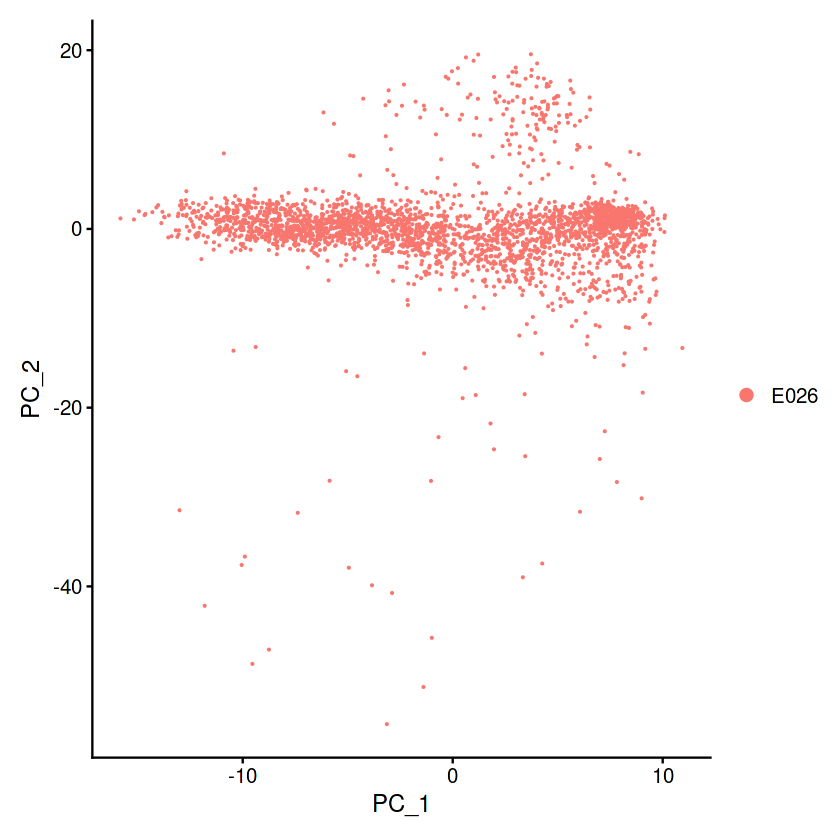

In [12]:
DimPlot(object = seu, pt.size = 0.1,reduction = 'pca')

In [13]:
# Examine and visualize PCA results 
print(seu[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  EEF1A1, RPS12, RPL32, RPLP1, RPS8 
Negative:  NKG7, KLRD1, GZMA, PRF1, CTSW 
PC_ 2 
Positive:  CD79A, MS4A1, LINC00926, FCRLA, BANK1 
Negative:  MKI67, TOP2A, ASPM, GTSE1, DLGAP5 
PC_ 3 
Positive:  HLA-DRA, HLA-DRB1, CD79A, MS4A1, HLA-DQB1 
Negative:  CTSW, GIMAP4, EEF1A1, ANXA1, TLE5 
PC_ 4 
Positive:  IL6ST, PDCD1, CD3D, MTRNR2L12, SPOCK2 
Negative:  CST3, TYROBP, FCER1G, TMSB4X, PFN1 
PC_ 5 
Positive:  CD79A, EEF1A1, RPL3, MS4A1, RPS3A 
Negative:  CST3, MS4A6A, SERPINA1, CD68, CSF1R 


In [14]:
#seu <- RunTSNE(object = seu, dims = 1:30)
seu <- RunUMAP(object = seu, dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:32:08 UMAP embedding parameters a = 0.9922 b = 1.112

11:32:08 Read 2810 rows and found 30 numeric columns

11:32:08 Using Annoy for neighbor search, n_neighbors = 30

11:32:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:32:08 Writing NN index file to temp file /tmp/RtmpyB2Sqy/fileef8a348179a3

11:32:08 Searching Annoy index using 1 thread, search_k = 3000

11:32:09 Annoy recall = 100%

11:32:10 Commencing smooth kNN distance calibration using 1 thread

11:32:10 Initializing fro

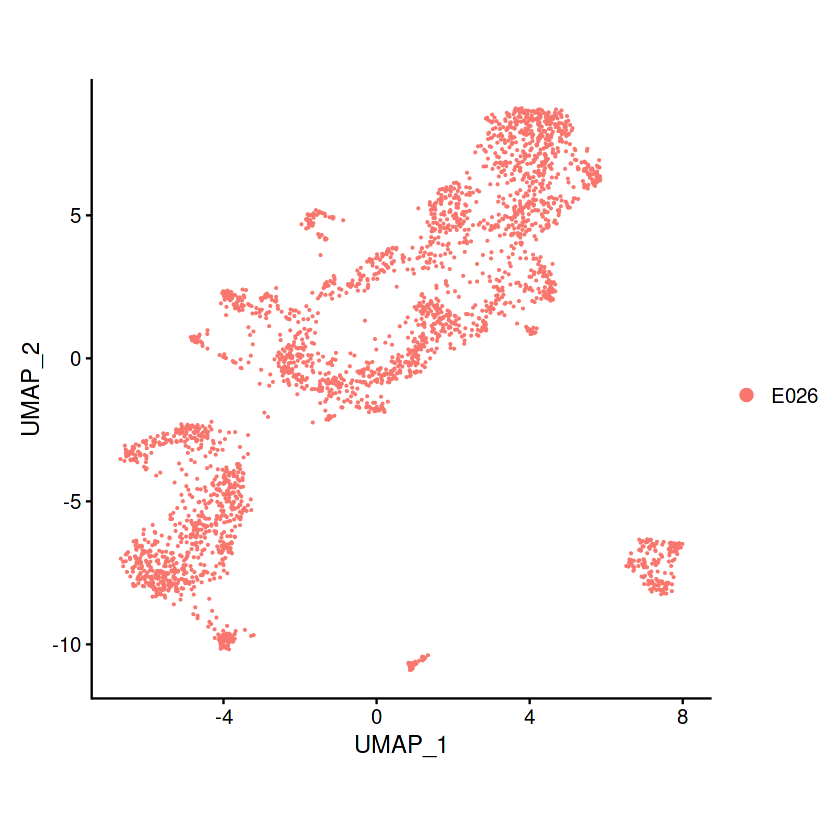

In [15]:
#DimPlot(object = seu,
#        reduction = 'tsne',label = F, 
#        pt.size = 0.1)+ theme(aspect.ratio=1)
DimPlot(object = seu,
        reduction = 'umap',label = F, 
        pt.size = 0.1)+ theme(aspect.ratio=1)

In [16]:
seu <- FindNeighbors(object = seu, dims = 1:30)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2810
Number of edges: 113019

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9513
Number of communities: 5
Elapsed time: 0 seconds



   0    1    2    3    4 
1245  742  594  170   59 

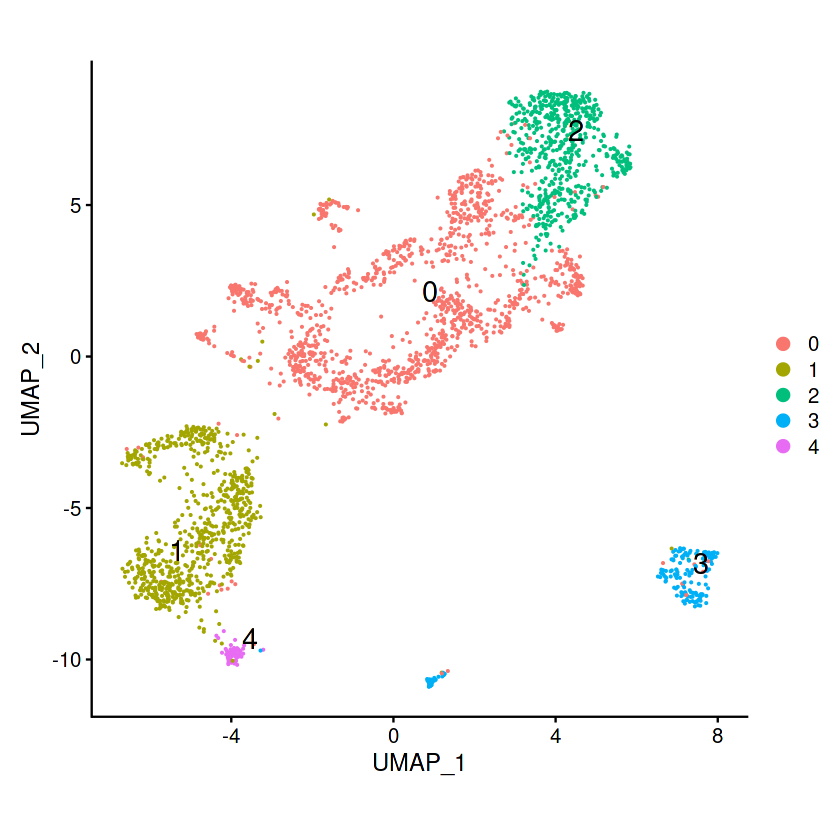

In [17]:
seu <- FindClusters(object = seu, resolution = 0.1)
table(Idents(seu))
#DimPlot(object = seu, reduction = 'tsne',label = TRUE, 
#        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)
DimPlot(object = seu, reduction = 'umap',label = TRUE, 
        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2810
Number of edges: 113019

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9272
Number of communities: 7
Elapsed time: 0 seconds



  0   1   2   3   4   5   6 
745 623 597 526 170  90  59 

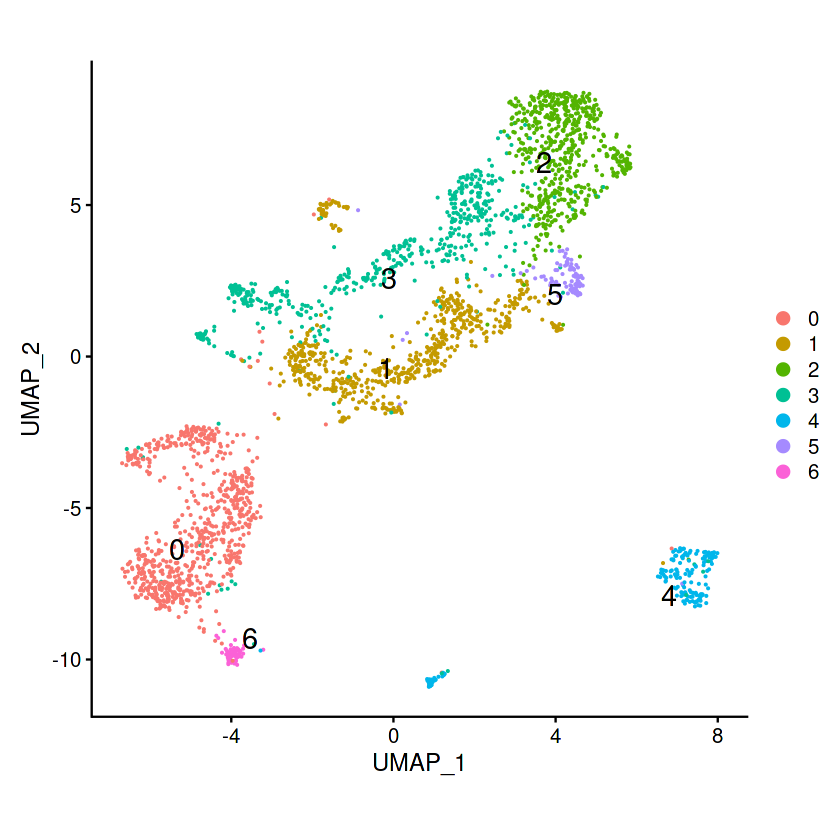

In [18]:
seu <- FindClusters(object = seu, resolution = 0.2)
table(Idents(seu))
#DimPlot(object = seu, reduction = 'tsne',label = TRUE, 
#        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)
DimPlot(object = seu, reduction = 'umap',label = TRUE, 
        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2810
Number of edges: 113019

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9087
Number of communities: 10
Elapsed time: 0 seconds



  0   1   2   3   4   5   6   7   8   9 
595 593 510 489 206 149 141  59  39  29 

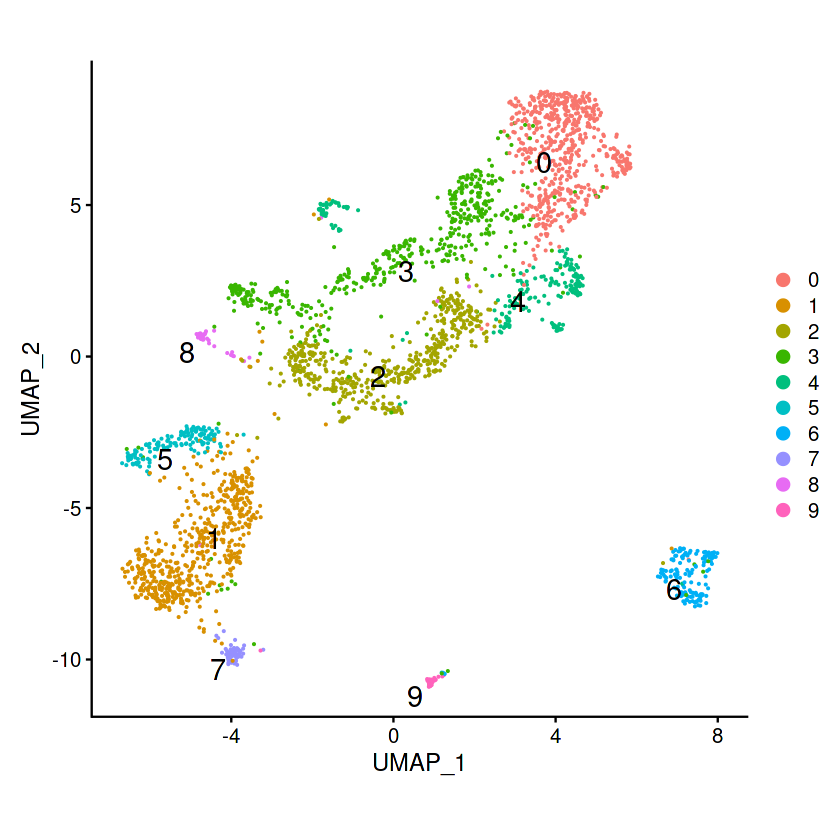

In [19]:
seu <- FindClusters(object = seu, resolution = 0.3)
table(Idents(seu))
#DimPlot(object = seu, reduction = 'tsne',label = TRUE, 
#        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)
DimPlot(object = seu, reduction = 'umap',label = TRUE, 
        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2810
Number of edges: 113019

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8922
Number of communities: 10
Elapsed time: 0 seconds



  0   1   2   3   4   5   6   7   8   9 
595 592 508 491 206 150 141  59  39  29 

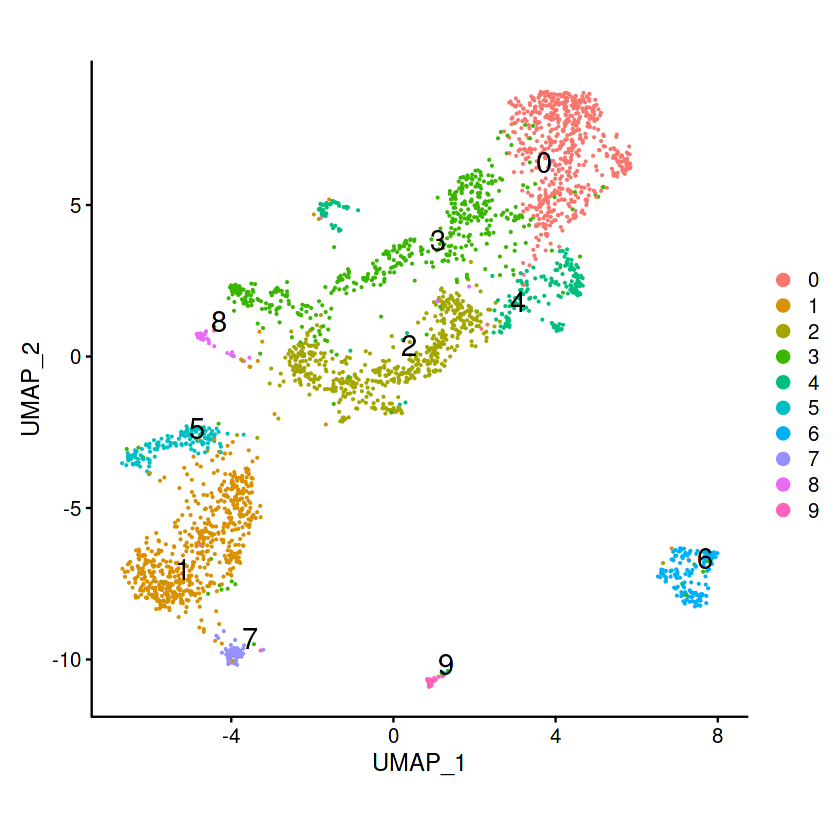

In [20]:
seu <- FindClusters(object = seu, resolution = 0.4)
table(Idents(seu))
#DimPlot(object = seu, reduction = 'tsne',label = TRUE, 
#        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)
DimPlot(object = seu, reduction = 'umap',label = TRUE, 
        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2810
Number of edges: 113019

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8670
Number of communities: 14
Elapsed time: 0 seconds



  0   1   2   3   4   5   6   7   8   9  10  11  12  13 
437 363 294 290 283 230 161 158 158 141 115  92  59  29 

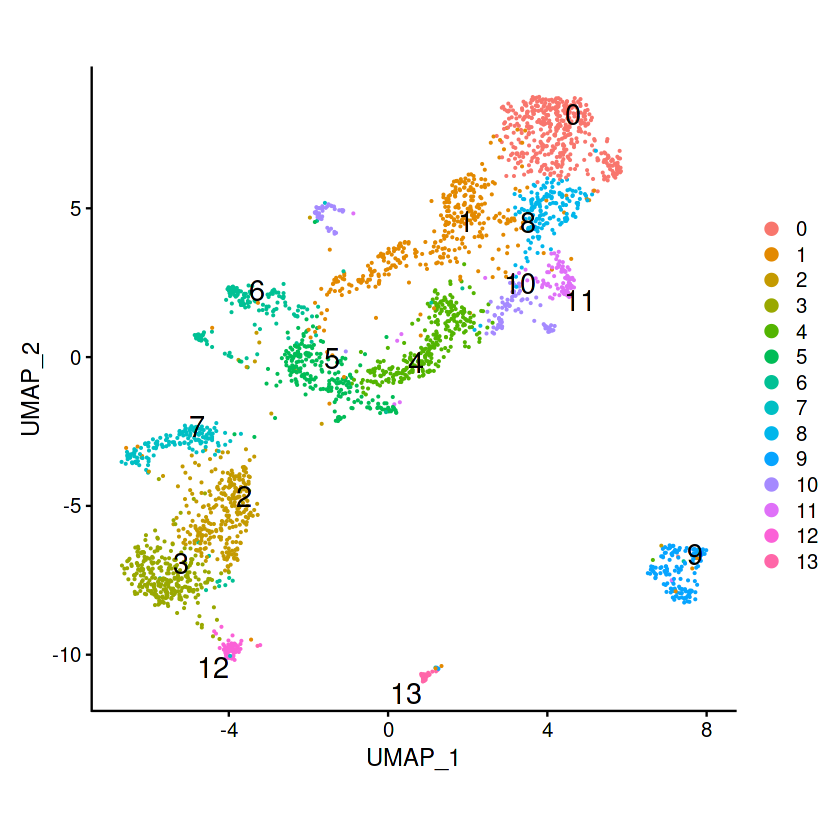

In [21]:
seu <- FindClusters(object = seu, resolution = 0.6)
table(Idents(seu))
#DimPlot(object = seu, reduction = 'tsne',label = TRUE, 
#        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)
DimPlot(object = seu, reduction = 'umap',label = TRUE, 
        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)

In [22]:
################

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2810
Number of edges: 113019

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8922
Number of communities: 10
Elapsed time: 0 seconds



  0   1   2   3   4   5   6   7   8   9 
595 592 508 491 206 150 141  59  39  29 

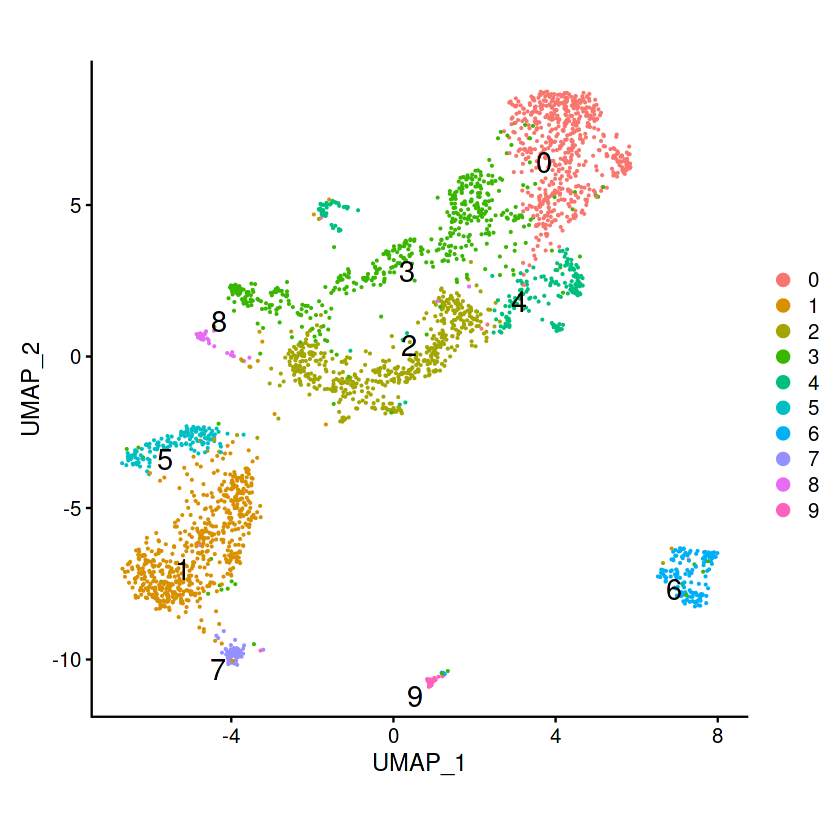

In [23]:
seu <- FindClusters(object = seu, resolution = 0.4)
table(Idents(seu))
#DimPlot(object = seu, reduction = 'tsne',label = TRUE, 
#        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)
DimPlot(object = seu, reduction = 'umap',label = TRUE, 
        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)

In [24]:
Idents(seu) <- seu@meta.data$seurat_clusters
ident_use = seu@meta.data$seurat_clusters

In [25]:
# nCells in total 
paste0(ncol(GetAssayData(object = seu, slot = "scale.data"))," cells in total")
# show percentage of nCells from each cluster 
cluster_nCell<-as.data.frame(table(ident_use))
colnames(cluster_nCell)<- c("cluster","nCells")
cluster_nCell$percent <-  round((cluster_nCell$nCells / sum(cluster_nCell$nCells)*100),2)
cluster_nCell

[1] "2810 cells in total"

cluster,nCells,percent
<fct>,<int>,<dbl>
0,595,21.17
1,592,21.07
2,508,18.08
3,491,17.47
4,206,7.33
5,150,5.34
6,141,5.02
7,59,2.10
8,39,1.39


In [26]:
# marker_qc<-c("nFeature_RNA","nCount_RNA","frac.mito","frac.ribo","CD3_count")
# for (n in marker_qc){
#     print(VlnPlot(object = seu, features = n,
#                   #group.by = "sample",
#                   #x.lab.rot=T, 
#                   #size.x.use = 5,
#                   pt.size = 0.01
#                        )+NoLegend()
#     )
#         print(VlnPlot(object = seu, features = n,
#                   #group.by = "sample",
#                   #x.lab.rot=T, 
#                   #size.x.use = 5,
#                   pt.size = 0
#                        )+NoLegend()
#     )
#     }

In [27]:
# find markers for every cluster compared to all remaining cells, report only the positive ones
seu.markers <- FindAllMarkers(object = seu, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.5)
#logfc.threshold=0.25 (default) instead of old version thresh.use=0.25
head(seu.markers)
dim(seu.markers)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
EEF1A1,1.218808e-285,1.524702,1,0.997,4.460960e-281,0,EEF1A1
RPS12,4.900369e-256,1.471064,1,0.977,1.793584e-251,0,RPS12
RPS3A,3.160046e-249,1.284621,1,0.949,1.156608e-244,0,RPS3A
RPS8,9.056520e-246,1.286662,1,0.970,3.314777e-241,0,RPS8
RPS4X,5.218390e-244,1.206331,1,0.962,1.909983e-239,0,RPS4X
RPL10,2.636908e-243,1.166670,1,0.995,9.651349e-239,0,RPL10


[1] 1595    7

In [28]:
top3 <- seu.markers %>% group_by(cluster) %>% top_n(3, avg_log2FC)
top5 <- seu.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)
top10 <- seu.markers %>% group_by(cluster) %>% top_n(10, avg_log2FC)

In [29]:
top10

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1.218808e-285,1.5247017,1.000,0.997,4.460960e-281,0,EEF1A1
4.900369e-256,1.4710643,1.000,0.977,1.793584e-251,0,RPS12
3.898974e-242,1.3399486,1.000,0.965,1.427064e-237,0,RPL32
4.863480e-212,1.4237731,1.000,0.774,1.780082e-207,0,EEF1B2
4.634153e-187,1.3979841,0.778,0.155,1.696146e-182,0,PRKCQ-AS1
3.097774e-175,1.4151370,0.687,0.121,1.133816e-170,0,CCR7
8.957875e-173,1.3252511,0.998,0.573,3.278672e-168,0,LDHB
2.305049e-172,1.3245293,0.645,0.105,8.436710e-168,0,TCF7
8.696415e-164,1.4803137,0.936,0.335,3.182975e-159,0,LTB


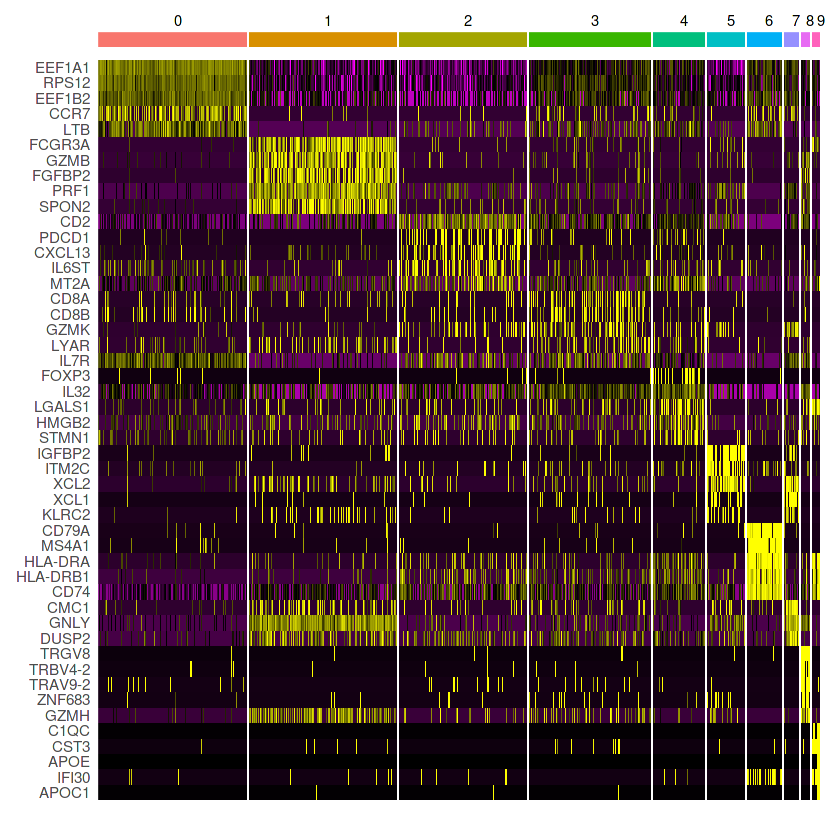

In [30]:
plt1<-DoHeatmap(object = seu, features = top5$gene,
         size = 3, angle=0)+NoLegend()
plt1

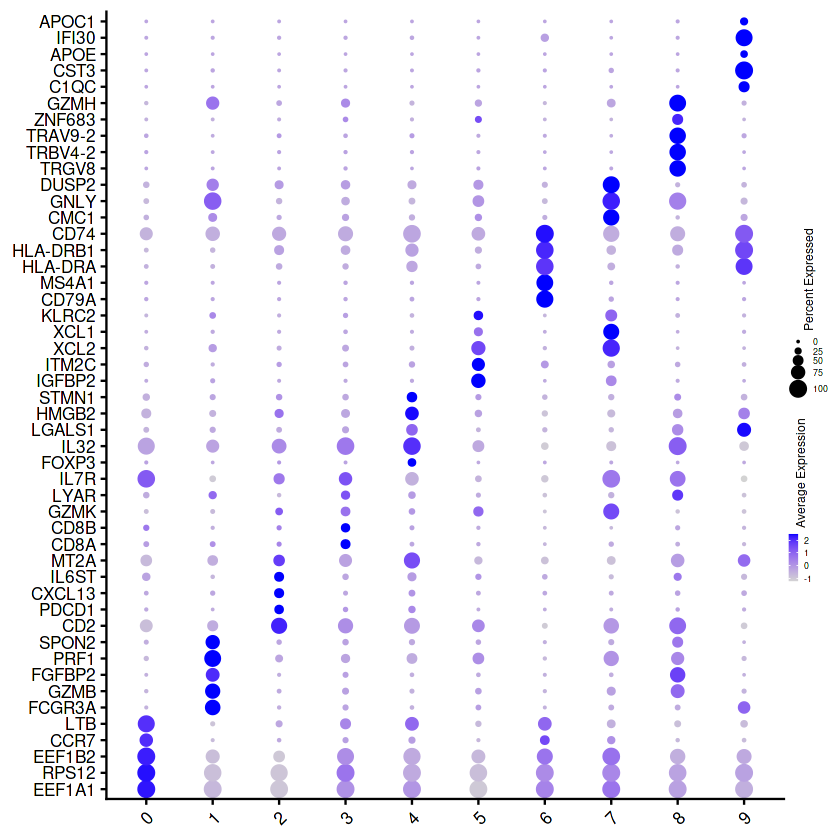

In [31]:
plt1<-DotPlot(seu, features = unique(top5$gene),
              dot.scale = 4
              #scale.by = "size"
             ) + coord_flip()+
theme(#strip.background = element_blank(),
    axis.title = element_blank(),
    axis.text.x = element_text(size = 10,angle = 45,hjust = 1),
    axis.text.y = element_text(size = 10),
     legend.position = "right",
     #legend.spacing = unit(0, "mm"),
     legend.direction = "vertical",
        legend.text = element_text(size=5),
        legend.key.width = unit(2, "mm"),
        legend.key.height = unit(2, "mm"),
        legend.box.spacing = unit(1, "mm"),
        legend.margin = margin(2),
        legend.title = element_text(size = 7,angle = 90)
)
plt1

In [32]:
DefaultAssay(seu)<-"RNA"

In [33]:
# Search for known marker genes in seu
leukos <- c("PTPRC") 
Tcells <- c("CD3G","CD3D","CD3E")
CD4<-c("CD4")
CD8 <- c("CD8A", "PRF1", "GZMB")
Memory<-c("CCR7","SELL","KLF2","CD69","S1PR1")
NK <- c("KLRC1")
Th1 <- c("TBX21", "IFNG", "LTA") 
Th2 <- c("GATA3", "IL4", "IL5", "IL13") 
Th17 <- c("RORC","IL17A","IL17F", "IL23R","CCR6") 
Tregs <- c("FOXP3", "IL2RA", "CTLA4")
Tr1<-c("IL10","ITGA2","LAG3","HAVCR2")#,"Ahr","Irf4","Prdm1","Maf")
Tgd<- c("TRDC","TCRG")
Prolif<-c("STMN1","MKI67")
#Tgd_Scart<-c("SCART2")
#T_APC<-c("C1QA","C1QB")
#others<-c("ZCCHC12","KLRC3","VCAM1")

known_markers<-list(
leukos,
Tcells,
CD4,
CD8,
Memory,
NK,
Th1,
Th2,
Th17,
Tregs,
Tr1,
Tgd,
Prolif
#Tgd_Scart,
#T_APC,
#others   
)
known_markers

marker_gene_list<-known_markers
length(unlist(marker_gene_list))
marker_gene_list_expressed <- intersect(unlist(marker_gene_list), rownames(GetAssayData(seu)))
length(marker_gene_list_expressed)
setdiff(unlist(marker_gene_list),marker_gene_list_expressed)

[[1]]
[1] "PTPRC"

[[2]]
[1] "CD3G" "CD3D" "CD3E"

[[3]]
[1] "CD4"

[[4]]
[1] "CD8A" "PRF1" "GZMB"

[[5]]
[1] "CCR7"  "SELL"  "KLF2"  "CD69"  "S1PR1"

[[6]]
[1] "KLRC1"

[[7]]
[1] "TBX21" "IFNG"  "LTA"  

[[8]]
[1] "GATA3" "IL4"   "IL5"   "IL13" 

[[9]]
[1] "RORC"  "IL17A" "IL17F" "IL23R" "CCR6" 

[[10]]
[1] "FOXP3" "IL2RA" "CTLA4"

[[11]]
[1] "IL10"   "ITGA2"  "LAG3"   "HAVCR2"

[[12]]
[1] "TRDC" "TCRG"

[[13]]
[1] "STMN1" "MKI67"

[1] 37

[1] 36

[1] "TCRG"

In [34]:
genes_to_plot<- marker_gene_list_expressed
length(genes_to_plot)

[1] 36

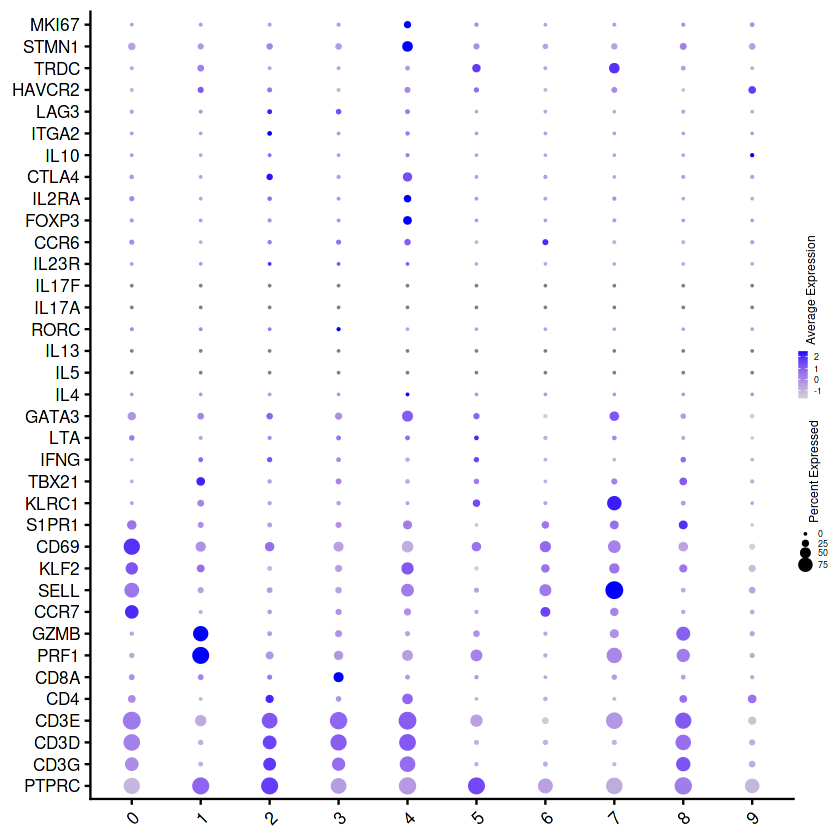

In [35]:
plt1<-DotPlot(seu, features = genes_to_plot,
              dot.scale = 4
              #scale.by = "size"
             ) + coord_flip()+
theme(#strip.background = element_blank(),
    axis.title = element_blank(),
    axis.text.x = element_text(size = 10,angle = 45,hjust = 1),
    axis.text.y = element_text(size = 10),
     legend.position = "right",
     #legend.spacing = unit(0, "mm"),
     legend.direction = "vertical",
        legend.text = element_text(size=5),
        legend.key.width = unit(2, "mm"),
        legend.key.height = unit(2, "mm"),
        legend.box.spacing = unit(1, "mm"),
        legend.margin = margin(2),
        legend.title = element_text(size = 7,angle = 90)
)
plt1

In [36]:
#############################

In [37]:
markers_to_plot<-c(
'CD4',
'CD8A',
'PRF1',
'GZMB',
'CCR7',
'SELL',
'KLF2',
'CD69',
'S1PR1',
'KLRC1',
'TBX21',
'IFNG',
'CXCR3',
'CXCR6',
'LTA',
'IL22',
'CCL20',    
'RORC',
'CSF2',   
'IL17A',
'IL17F',
'IL23R',
'CCR6',
'FOXP3',
'IL2RA',
'CTLA4',
'IL10',
'LAG3',
'HAVCR2',
'TRDC',
'CD79A',
'STMN1',
'MKI67')

In [38]:
# for (n in markers_to_plot){
#     print(VlnPlot(object = seu, features = n,
#                   #group.by = "sample",
#                   #x.lab.rot=T, 
#                   #size.x.use = 5,
#                   pt.size = 0.01
#                        )+NoLegend()
#     )
#     print(FeaturePlot(object = seu,features = n,
#                   cols = c("lightgrey", "blue"),
#                       order = T,
#                       reduction = "umap",
#                 pt.size=1
#                        ))    

#     }

In [39]:
DefaultAssay(object = seu) <- "CITE"

In [40]:
seu

An object of class Seurat 
36642 features across 2810 samples within 2 assays 
Active assay: CITE (41 features, 0 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [41]:
##CITE
seu <- NormalizeData(object = seu, assay = "CITE", 
                     normalization.method = "LogNormalize",
                     scale.factor = 10)
seu <- ScaleData(seu, assay = "CITE", display.progress = T)

Warning message:
“The following arguments are not used: display.progress”
Suggested parameter: verbose instead of display.progress


Centering and scaling data matrix



In [42]:
CITE_gene<-
c(
"cite_HashB",
"cite_HashK",
"cite_CD45",
"cite_CD3",
"cite_CD4",
"cite_CD8",
"cite_TCRab",
"cite_TCRgd",
"cite_TCRVa7.2",
"cite_TCRVa24Ja18",
"cite_CD45RA",
"cite_CD45RO",
"cite_PDL1",
"cite_CD154",
"cite_CD56",
"cite_CD14",
"cite_CD19",
"cite_HLAABC",
"cite_CD7",
"cite_CD49f",
"cite_CD25",
"cite_TIGIT",
"cite_CTLA4",
"cite_CD31",
"cite_CD44",
"cite_PDPN",
"cite_CD103",
"cite_CD69",
"cite_CD62L",
"cite_CD161",
"cite_LAG3",
"cite_CD27",
"cite_LAMP1",
"cite_HLADR",
"cite_NKG2D",
"cite_CD57",
"cite_KLRG1",
"cite_CD38",
"cite_CD127",
"cite_CD169")

In [43]:
cite_gene<-
c(
"HashB",
"HashK",
"CD45",
"CD3",
"CD4",
"CD8",
"TCRab",
"TCRgd",
"TCRVa7.2",
"TCRVa24Ja18",
"CD45RA",
"CD45RO",
"PDL1",
"CD154",
"CD56",
"CD14",
"CD19",
"HLAABC",
"CD7",
"CD49f",
"CD25",
"TIGIT",
"CTLA4",
"CD31",
"CD44",
"PDPN",
"CD103",
"CD69",
"CD62L",
"CD161",
"LAG3",
"CD27",
"LAMP1",
"HLADR",
"NKG2D",
"CD57",
"KLRG1",
"CD38",
"CD127",
"CD169")

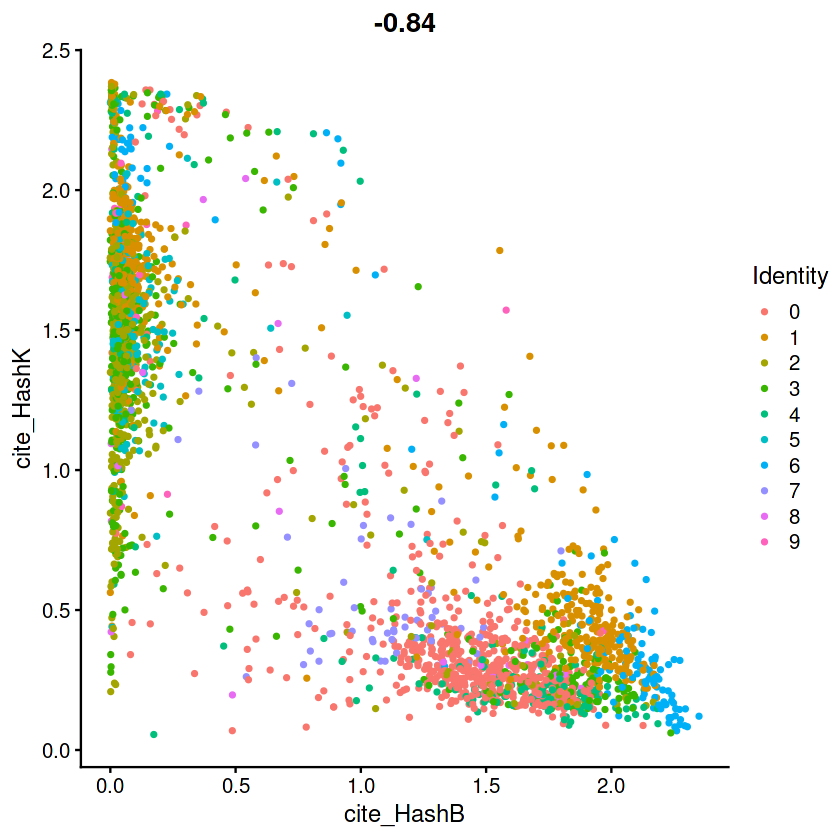

In [44]:
FeatureScatter(seu, feature1 = "cite_HashB", feature2 = "cite_HashK")
#FeatureScatter(seu, feature1 = "cite_HashB", feature2 = "cite_HashK",
#              slot = "counts")

In [45]:
# for (n in CITE_gene){
#     print(FeaturePlot(object = seu,features = n,
#                   cols = c("lightgrey", "blue"),
#                       order = T,
#                       slot = "data",
#                       #min.cutoff = "q20", max.cutoff = "q80",
#                       reduction = "umap",
#                 pt.size=1
#                        ))   
#       print(VlnPlot(object = seu, features = n,
#                  #group.by = "sample",
#                  #x.lab.rot=T, 
#                  #size.x.use = 5,
#                  pt.size = 0.01
#                       )+NoLegend()
#    )
#     print(RidgePlot(seu, 
#               features = n))

#     }

In [46]:
dim(seu@assays$CITE)

[1]   41 2810

In [47]:
seu_1<-seu

In [48]:
hto_mt<-as.matrix(
    seu@assays$CITE@counts[c("HashK","HashB"),])
#rownames(hto_mt)<-c("HashB","HashK")
seu_1[["HTO"]] <- CreateAssayObject(counts = hto_mt)

In [49]:
dim(seu_1@assays$HTO@data)

[1]    2 2810

In [50]:
as.matrix(seu_1@assays$HTO@data)

,AAACCTGCACGAGGTA-1,AAACCTGCACTCGACG-1,AAACCTGCAGATGAGC-1,AAACCTGGTACTCTCC-1,AAACCTGGTAGCTAAA-1,AAACCTGGTCCGAATT-1,AAACCTGGTCGGCACT-1,AAACGGGAGATGCCAG-1,AAACGGGAGTCAATAG-1,AAACGGGCACAGCCCA-1,AAACGGGCAGTCGTGC-1,AAACGGGGTGGTGTAG-1,AAACGGGTCACAATGC-1,AAACGGGTCTCCAGGG-1,AAAGATGAGACCCACC-1,AAAGATGCAGACAAGC-1,AAAGATGCAGCTGCAC-1,AAAGATGCATACCATG-1,AAAGATGCATGAGCGA-1,AAAGATGGTTATTCTC-1,AAAGCAACATAGTAAG-1,AAAGCAAGTCAAGCGA-1,AAAGCAAGTGAAAGAG-1,AAAGCAAGTTGATTCG-1,AAAGCAATCAGGATCT-1,AAAGTAGCACAAGCCC-1,AAATGCCCAAAGCGGT-1,AAATGCCGTTGTACAC-1,AAATGCCTCCCATTTA-1,AACACGTCACCTCGTT-1,AACACGTGTATGAAAC-1,AACACGTGTTGAGTTC-1,AACACGTGTTGGACCC-1,AACACGTTCACGCGGT-1,AACACGTTCTAACTTC-1,AACCATGCAGCAGTTT-1,AACCATGGTACAGTGG-1,AACCATGGTTTGCATG-1,AACCATGTCGTGGGAA-1,AACCATGTCTTTAGGG-1,AACCGCGAGACACTAA-1,AACCGCGAGTTAAGTG-1,AACCGCGCAAAGAATC-1,AACCGCGGTCAGGACA-1,AACCGCGGTCGAGATG-1,AACCGCGTCCCATTTA-1,AACGTTGAGATGCCAG-1,AACGTTGCAAGTCTGT-1,AACGTTGGTTTCGCTC-1,AACGTTGTCTGTTGAG-1,AACTCAGAGAGACTAT-1,AACTCAGCACCGAAAG-1,AACTCAGGTTGCGCAC-1,AACTCAGTCTCAAACG-1,AACTCCCCAAGCTGTT-1,AACTCCCCAAGGTTCT-1,AACTCCCGTCCATCCT-1,AACTCCCTCGACGGAA-1,AACTCTTCATACTACG-1,AACTCTTCATCCTTGC-1,AACTCTTGTAGCGATG-1,AACTCTTGTTAGAACA-1,AACTCTTTCACCTCGT-1,AACTCTTTCATGTGGT-1,AACTGGTAGATATACG-1,AACTGGTAGCGGATCA-1,AACTGGTCACAGCCCA-1,AACTGGTCACTCAGGC-1,AACTGGTTCTCGTTTA-1,AACTTTCAGATGAGAG-1,AACTTTCAGCTTCGCG-1,AACTTTCCACACAGAG-1,AACTTTCTCCTTAATC-1,AAGACCTAGCACAGGT-1,AAGACCTAGCGAAGGG-1,AAGACCTGTCAACTGT-1,AAGACCTGTCTAAACC-1,AAGACCTGTTGCCTCT-1,AAGACCTTCTTACCTA-1,AAGCCGCCATATGCTG-1,AAGCCGCCATGGTAGG-1,AAGCCGCGTATCTGCA-1,AAGGAGCAGAAGGGTA-1,AAGGAGCAGTGGCACA-1,AAGGAGCCAAGCTGGA-1,AAGGAGCCACGGTAGA-1,AAGGAGCGTGCCTGCA-1,AAGGAGCTCCGCAAGC-1,AAGGAGCTCCGTACAA-1,AAGGAGCTCCTGCAGG-1,AAGGCAGCACGCATCG-1,AAGGCAGTCAACGAAA-1,AAGGCAGTCCTTGACC-1,AAGGTTCCAAGAGGCT-1,AAGGTTCGTAGCGTAG-1,AAGGTTCGTTCGCGAC-1,AAGGTTCTCAACACAC-1,AAGTCTGAGACCTAGG-1,AAGTCTGAGTGGTAAT-1,AAGTCTGCAAGGACAC-1,⋯,TTCTACACATATACCG-1,TTCTACACATGTCCTC-1,TTCTACAGTGATGATA-1,TTCTACATCAGTCCCT-1,TTCTACATCTCGCATC-1,TTCTCAACACGTTGGC-1,TTCTCAAGTGGTCTCG-1,TTCTCAAGTGTTGAGG-1,TTCTCCTAGGACAGAA-1,TTCTCCTCAAGCTGTT-1,TTCTTAGGTCTAAAGA-1,TTCTTAGTCATTTGGG-1,TTGAACGAGCACAGGT-1,TTGAACGAGCTGCCCA-1,TTGAACGCAAACGTGG-1,TTGAACGGTCATATCG-1,TTGACTTAGGCCCTCA-1,TTGACTTGTAGCGTCC-1,TTGACTTGTCGCTTTC-1,TTGACTTTCACCACCT-1,TTGCCGTAGCATCATC-1,TTGCCGTAGCCACCTG-1,TTGCCGTAGGGTATCG-1,TTGCCGTAGTACCGGA-1,TTGCCGTAGTGCTGCC-1,TTGCCGTCACACAGAG-1,TTGCCGTCATCGACGC-1,TTGCCGTGTGGTCCGT-1,TTGCCGTTCAATCACG-1,TTGCCGTTCGCGATCG-1,TTGCCGTTCTGCGGCA-1,TTGCCGTTCTTCGGTC-1,TTGCGTCAGGATGTAT-1,TTGCGTCAGTGGAGTC-1,TTGCGTCCACAGAGGT-1,TTGCGTCCATGCATGT-1,TTGCGTCGTCTCTCTG-1,TTGCGTCTCAGGTTCA-1,TTGGAACGTAACGCGA-1,TTGGAACGTAGCTGCC-1,TTGGAACGTCCCGACA-1,TTGGCAAAGACTAAGT-1,TTGGCAAAGAGATGAG-1,TTGGCAACACAGACTT-1,TTGGCAAGTACGAAAT-1,TTGGCAAGTGCACCAC-1,TTGGCAATCAGGCGAA-1,TTGGCAATCGGCTTGG-1,TTGGCAATCTGGTTCC-1,TTGGCAATCTTGGGTA-1,TTGTAGGAGTGGCACA-1,TTGTAGGGTGACGGTA-1,TTGTAGGGTGCACTTA-1,TTGTAGGTCCAAGTAC-1,TTGTAGGTCTGCTGTC-1,TTTACTGCAGGAACGT-1,TTTACTGCATTGAGCT-1,TTTACTGGTCGCGAAA-1,TTTACTGGTTATCCGA-1,TTTACTGTCCCTTGTG-1,TTTACTGTCTTGTACT-1,TTTATGCAGGCGACAT-1,TTTATGCAGTACATGA-1,TTTATGCAGTCGTTTG-1,TTTATGCCACCGAATT-1,TTTATGCCACTTCTGC-1,TTTATGCCATGCCTAA-1,TTTATGCTCCTCATTA-1,TTTCCTCAGGGTTTCT-1,TTTCCTCCAAATACAG-1,TTTCCTCCACCCATGG-1,TTTCCTCCACCTGGTG-1,TTTCCTCCATGGTCTA-1,TTTCCTCCATGGTTGT-1,TTTCCTCGTCCAAGTT-1,TTTCCTCGTGAGTATA-1,TTTCCTCTCTGAGTGT-1,TTTCCTCTCTTCGAGA-1,TTTGCGCAGACGCTTT-1,TTTGCGCAGTGTACGG-1,TTTGCGCCACCGTTGG-1,TTTGCGCCACCTCGTT-1,TTTGGTTAGACAAAGG-1,TTTGGTTAGACAAGCC-1,TTTGGTTAGGACGAAA-1,TTTGGTTCACCCATTC-1,TTTGGTTGTATCACCA-1,TTTGGTTGTGAAGGCT-1,TTTGGTTTCATGCATG-1,TTTGGTTTCCAGTATG-1,TTTGGTTTCCCAAGAT-1,TTTGGTTTCCGTACAA-1,TTTGTCAAGACTAAGT-1,TTTGTCAAGCCGTCGT-1,TTTGTCAAGGAGCGAG-1,TTTGTCACATGTTGAC-1,TTTGTCAGTACGCACC-1,TTTGTCAGTCCTAGCG-1,TTTGTCAGTGACGCCT-1,TTTGTCATCTTAGCCC-1
HashK,660,550,254,6698,6939,288,47,46,1588,670,89,36,841,46,93,977,43,48,744,40,1573,443,925,43,827,37,27,383,23,36,526,1370,55,338,44,42,40,42,331,708,56,754,26,1041,38,392,32880,33,491,37,3414,88

In [51]:
seu_1 <- NormalizeData(seu_1, assay = "HTO", 
                       normalization.method = "CLR")

Normalizing across features



In [52]:
seu_1 <- HTODemux(seu_1, assay = "HTO", positive.quantile = 0.99)

Cutoff for HashK : 368 reads

Cutoff for HashB : 57 reads



In [53]:
table(seu_1$HTO_classification.global)


 Doublet Negative  Singlet 
     150      454     2206 

Picking joint bandwidth of 0.0524

Picking joint bandwidth of 0.0736



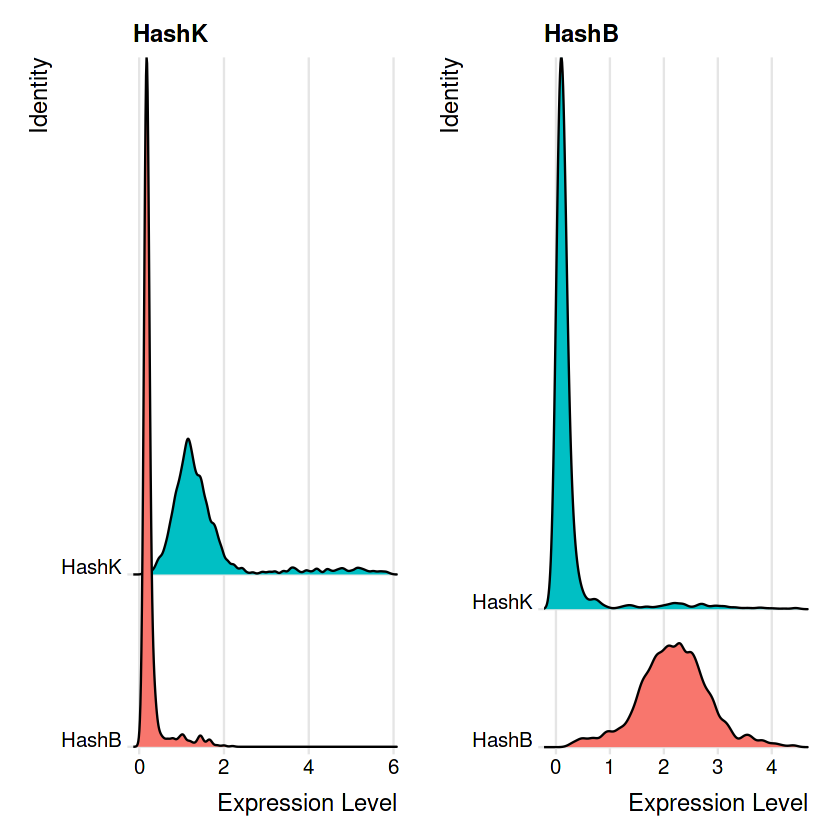

In [54]:
Idents(seu_1) <- "HTO_maxID"
RidgePlot(seu_1, assay = "HTO", 
          features = rownames(seu_1[["HTO"]])[1:2],
          ncol = 2)

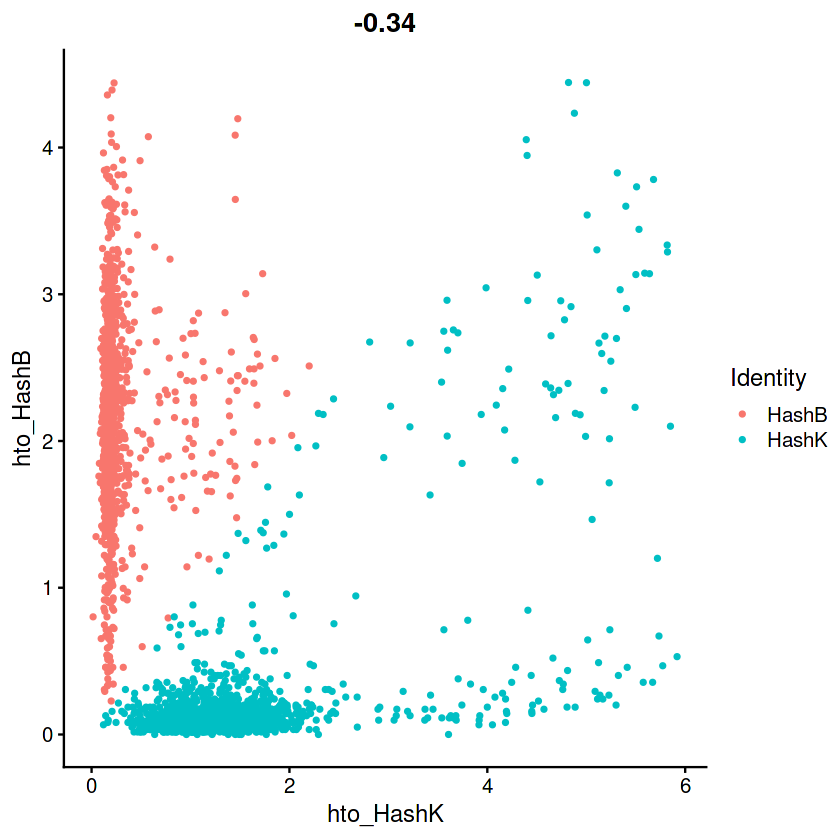

In [55]:
FeatureScatter(seu_1, feature1 = "hto_HashK", 
               feature2 = "hto_HashB")

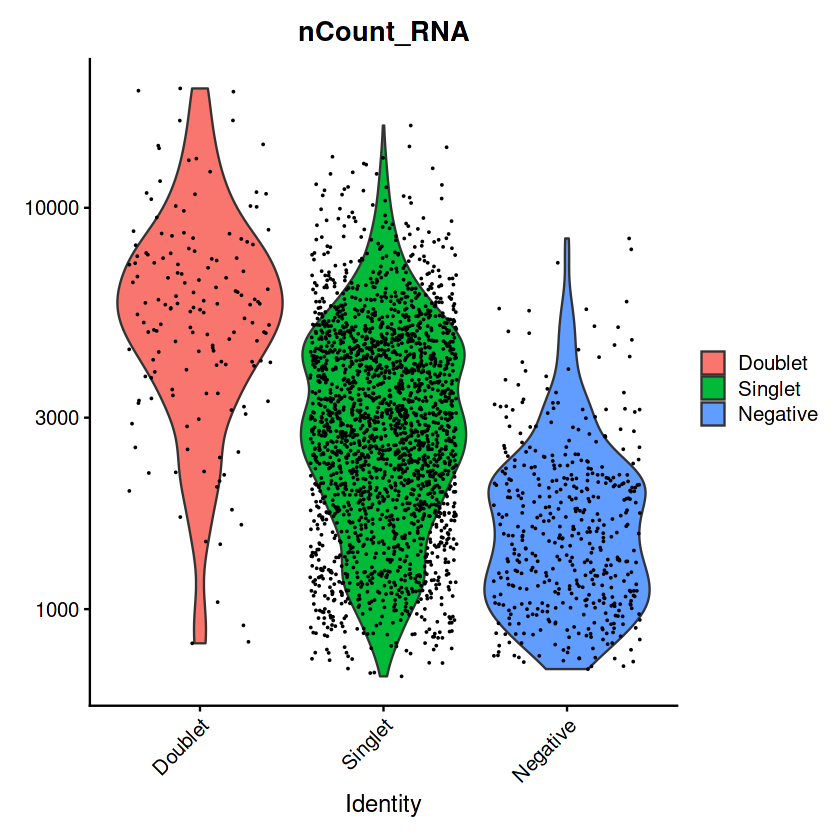

In [56]:
Idents(seu_1) <- "HTO_classification.global"
VlnPlot(seu_1, features = "nCount_RNA", 
        pt.size = 0.01, log = TRUE)

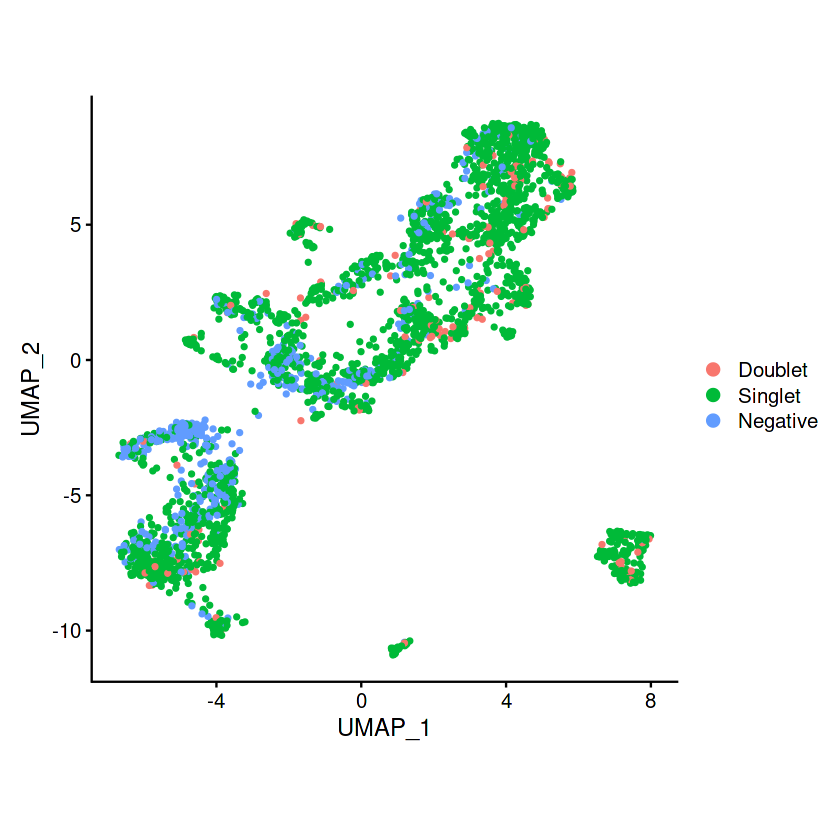

In [57]:
DimPlot(object = seu_1, reduction = 'umap',label = F, 
        pt.size = 1,label.size = 6, repel = T
       ) + theme(aspect.ratio=1)

In [58]:
seu_sub <- subset(seu_1, idents = "Singlet")
seu_sub

An object of class Seurat 
36644 features across 2206 samples within 3 assays 
Active assay: CITE (41 features, 0 variable features)
 2 other assays present: RNA, HTO
 2 dimensional reductions calculated: pca, umap

In [59]:
Idents(seu_sub) <- "HTO_maxID"

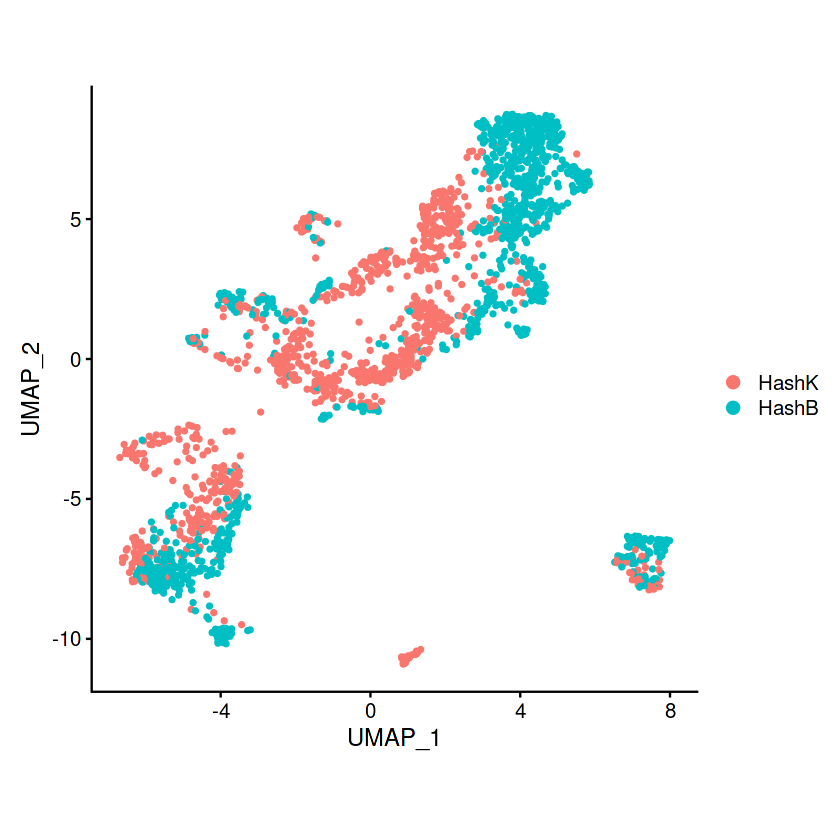

In [60]:
DimPlot(object = seu_sub, reduction = 'umap',label = F, 
        pt.size = 1,label.size = 6, repel = T
       ) + theme(aspect.ratio=1)

In [61]:
seu_K <- subset(seu_sub, idents = "HashK")
seu_B <- subset(seu_sub, idents = "HashB")

In [62]:
samples_ID

[1] "E026"

In [63]:
save_path_K = file.path(save_dir, paste0(samples_ID, "K.rds"))
save_path_B = file.path(save_dir, paste0(samples_ID, "B.rds"))

print(save_path_K)
print(save_path_B)

[1] "data/single-cell/exploratory/prefiltering_objects/E026K.rds"
[1] "data/single-cell/exploratory/prefiltering_objects/E026B.rds"


In [64]:
saveRDS(seu_K, save_path_K)
saveRDS(seu_B, save_path_B)